In [2]:
import random
import functools
max_size = 1000
max_n = 1000
count = 0

def generateRandomList(size, max_value):
    return [random.randint(1, max_value) for _ in range(size)]

unsorted = generateRandomList(max_size, max_n)
control = unsorted.copy()

if unsorted == control:
	print("The control and unsorted are the same")

def merge(arr,left, right):
    global count
    i = j = k = 0
    while i < len(left) and j < len(right):
        count+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

def insertion_sort(arr):
    global count
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            count+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def hybrid_sort(arr, s):
    if len(arr) <= s:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    hybrid_sort(left, s)
    hybrid_sort(right, s)
    return merge(arr,left,right)

count=0
S = 10
sorted_list = hybrid_sort(unsorted,10)
control = sorted(control)

# check that algo is correct

if functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q,sorted_list,control), True):
    print ("The control and sorted are the same")

print("Number of comparisons: {}".format(count))
print(sorted_list[:100])
print(control[:100])

The control and unsorted are the same
The control and sorted are the same
Number of comparisons: 8503
[1, 2, 3, 3, 4, 4, 4, 5, 6, 6, 8, 8, 9, 12, 13, 13, 13, 14, 15, 15, 16, 16, 16, 17, 21, 21, 22, 23, 23, 24, 24, 26, 27, 28, 31, 32, 32, 33, 34, 37, 37, 38, 38, 40, 40, 41, 42, 43, 44, 44, 44, 45, 46, 47, 49, 50, 50, 50, 51, 51, 52, 52, 54, 57, 58, 58, 59, 59, 60, 60, 62, 64, 67, 67, 69, 70, 71, 77, 79, 79, 79, 80, 85, 85, 85, 87, 89, 90, 91, 91, 92, 99, 102, 105, 105, 105, 106, 107, 108, 108]
[1, 2, 3, 3, 4, 4, 4, 5, 6, 6, 8, 8, 9, 12, 13, 13, 13, 14, 15, 15, 16, 16, 16, 17, 21, 21, 22, 23, 23, 24, 24, 26, 27, 28, 31, 32, 32, 33, 34, 37, 37, 38, 38, 40, 40, 41, 42, 43, 44, 44, 44, 45, 46, 47, 49, 50, 50, 50, 51, 51, 52, 52, 54, 57, 58, 58, 59, 59, 60, 60, 62, 64, 67, 67, 69, 70, 71, 77, 79, 79, 79, 80, 85, 85, 85, 87, 89, 90, 91, 91, 92, 99, 102, 105, 105, 105, 106, 107, 108, 108]


Intersection: 0 Number of times: 200
Intersection: 1 Number of times: 22
Intersection: 2 Number of times: 23
Intersection: 4 Number of times: 8
Intersection: 5 Number of times: 18
Intersection: 7 Number of times: 15
Intersection: 9 Number of times: 14
Intersection: 12 Number of times: 11
Intersection: 13 Number of times: 9
Intersection: 15 Number of times: 10
Intersection: 17 Number of times: 6
Intersection: 20 Number of times: 5
Intersection: 22 Number of times: 2


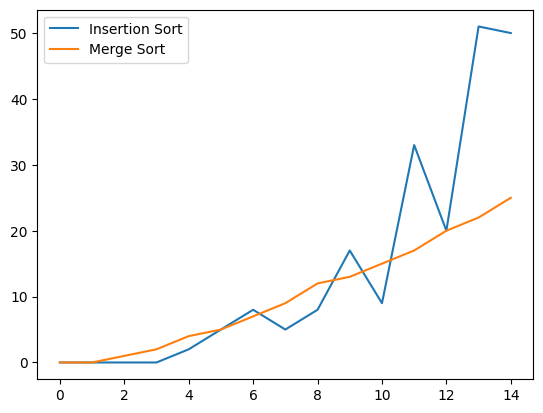

In [44]:
import matplotlib.pyplot as plt
import collections

def insertion_sort(arr):
    count = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            count+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return count

countMerge = 0
def merge(arr,left, right):
    global countMerge
    i = j = k = 0
    while i < len(left) and j < len(right):
        countMerge+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

hashTable = {}

for i in range(100):
    testArrays = []
    for size in range(15):
        testArrays.append(generateRandomList(size, size))

    keyComparisonsInsert = []
    keyComparisonsMerge = []

    for arr in testArrays:
        countInsert = insertion_sort(arr)
        mergeSort(arr)
        keyComparisonsInsert.append(countInsert)
        countInsert=0
        keyComparisonsMerge.append(countMerge)
        countMerge=0

    for i in range(15):
        if keyComparisonsInsert[i] == keyComparisonsMerge[i]:
            hashTable[keyComparisonsInsert[i]] = hashTable.get(keyComparisonsInsert[i], 0) + 1

od = collections.OrderedDict(sorted(hashTable.items()))
for key in od:
    print("Intersection: {} Number of times: {}".format(key, od[key]))

plt.plot(keyComparisonsInsert, label="Insertion Sort")
plt.plot(keyComparisonsMerge, label="Merge Sort")
plt.legend()
plt.show()


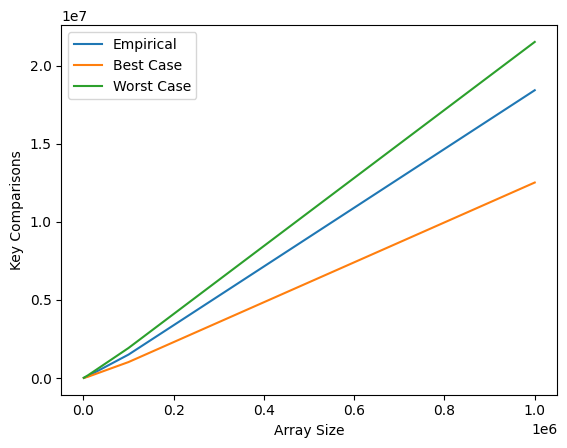

In [59]:
import numpy as np
hybridCount = 0

def merge(arr,left, right):
    global hybridCount
    i = j = k = 0
    while i < len(left) and j < len(right):
        hybridCount+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

def insertion_sort(arr):
    global hybridCount
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            hybridCount+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def hybrid_sort(arr, s):
    if len(arr) <= s:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    hybrid_sort(left, s)
    hybrid_sort(right, s)
    return merge(arr,left,right)

keyComparisonsHybrid = []
testArrays = []
sizes = [1000, 10000, 100000, 1000000]
best_case = np.array(sizes) + np.array(sizes) * np.log(np.array(sizes)/S)
worst_case = np.array(sizes) * S + np.array(sizes) * np.log(np.array(sizes)/S)

for size in sizes:
    testArrays.append(generateRandomList(size, size))

for arr in testArrays:
    hybrid_sort(arr, 10)
    keyComparisonsHybrid.append(hybridCount)
    hybridCount=0

plt.plot(sizes,keyComparisonsHybrid, label="Empirical")
plt.plot(sizes, best_case, label='Best Case')
plt.plot(sizes, worst_case, label='Worst Case')
plt.xlabel('Array Size')
plt.ylabel('Key Comparisons')
plt.legend()
plt.show()

In [50]:
print(keyComparisonsHybrid)

[8537, 128472, 1626960, 20047859, 239485042]
